In [278]:
import kagglehub


path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cat-and-dog


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_gen = train_datagen.flow_from_directory(
    train_dir,               
    target_size=(128,128),   
    batch_size=32,
    subset='training',      
    class_mode='binary'     
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    subset='validation',     
    class_mode='binary', 
    shuffle= False
)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import os


In [ ]:

train_dir = "/kaggle/input/cat-and-dog/training_set"
test_dir = "/kaggle/input/cat-and-dog/test_set"


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)


train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    subset='training',
    class_mode='binary'
)


val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    subset='validation',
    class_mode='binary'
)


In [ ]:
# CNN Modeli
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  
])

# Modeli compile et
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:

print(val_gen.class_indices)
print(val_gen.classes[:20])  


In [ ]:
import os

base_dir = "/kaggle/input/cat-and-dog/training_set/training_set"
print(os.listdir(base_dir)) 


In [ ]:
import os
import shutil

base_dir = "/kaggle/input/cat-and-dog/training_set"
new_base = "/kaggle/working/data"  

os.makedirs(new_base, exist_ok=True)
os.makedirs(os.path.join(new_base, "cat"), exist_ok=True)
os.makedirs(os.path.join(new_base, "dog"), exist_ok=True)

for file in os.listdir(base_dir):
    if file.startswith("cat"):
        shutil.copy(os.path.join(base_dir, file), os.path.join(new_base, "cat"))
    elif file.startswith("dog"):
        shutil.copy(os.path.join(base_dir, file), os.path.join(new_base, "dog"))

print(os.listdir(new_base))
print(len(os.listdir(os.path.join(new_base,"cat"))), len(os.listdir(os.path.join(new_base,"dog"))))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/kaggle/input/cat-and-dog/training_set/training_set"  
test_dir = "/kaggle/input/cat-and-dog/test_set/test_set"          


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)


train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)


val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


In [ ]:
from tensorflow.keras import layers, Sequential

model = models.Sequential([
    layers.Input(shape=(128,128,3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid') 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,  # dilersen 15-20 yapabilirsin
    verbose=1
)


In [ ]:

model.save('/kaggle/working/sequential_1.h5')

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    verbose=1
)


In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


test_gen.reset()
preds = model.predict(test_gen, verbose=1)
y_pred = np.where(preds>0.5, 1, 0)  # 0=cat, 1=dog
y_true = test_gen.classes


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(test_gen.class_indices.keys()), yticklabels=list(test_gen.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))


In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = test_gen.classes  # gerçek labellar
cm = confusion_matrix(y_true, y_pred)


cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6,5))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Cats vs Dogs Confusion Matrix')
plt.show()


In [279]:
import numpy as np


dummy_input = np.zeros((1, 128, 128, 3))


pred = model.predict(dummy_input)  # Eğer modelin adı 'model' ise
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
[[0.5]]


In [280]:


model = load_model('/kaggle/working/sequential_1.h5')


class_names = ['Cat', 'Dog']

# ------------------------

# ------------------------
input_shape = model.input_shape  # (None, 128, 128, 3)
dummy_input = np.zeros((1, input_shape[1], input_shape[2], input_shape[3]))
dummy_pred = model.predict(dummy_input)
dummy_label = class_names[int(dummy_pred[0][0] > 0.5)]
print("Dummy input prediction:", dummy_label)

from tensorflow.keras.preprocessing import image
import numpy as np


img = image.load_img(img_path, target_size=(128,128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)  # batch dimension ekle
x = x / 255.0                  # normalize et


pred = model.predict(x)
label = 'Dog' if pred[0][0] > 0.5 else 'Cat'
print("Prediction:", label)

real_pred = model.predict(x)
real_label = class_names[int(real_pred[0][0] > 0.5)]
print("Real image prediction:", real_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Dummy input prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Real image prediction: Dog


In [281]:
from tensorflow.keras.preprocessing import image
import numpy as np


img = image.load_img(img_path, target_size=(128,128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) 
x = x / 255.0                 


prediction = model.predict(x)  


pred_value = prediction[0][0]


label = "Dog" if pred_value > 0.5 else "Cat"

print(f"The model predicts: {label} (confidence: {pred_value:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The model predicts: Dog (confidence: 0.51)


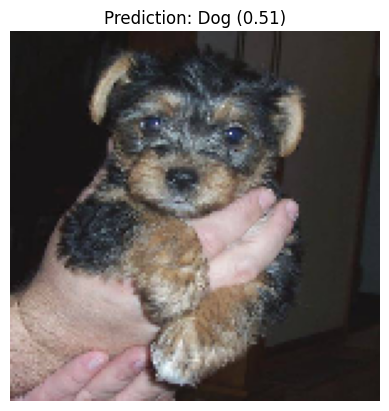

In [282]:
import matplotlib.pyplot as plt


img = load_img("/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4002.jpg", target_size=(150, 150))

plt.imshow(img)
plt.title(f"Prediction: {label} ({pred_value:.2f})")
plt.axis('off')
plt.show()

In [283]:

y_pred = model.predict(test_gen, verbose=1)


y_pred_labels = np.where(y_pred > 0.5, 1, 0)


y_true = test_gen.classes


from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_true, y_pred_labels, target_names=list(test_gen.class_indices.keys())))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_labels))

64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step

Classification Report:
              precision    recall  f1-score   support

        cats       0.58      0.78      0.67      1011
        dogs       0.67      0.44      0.53      1012

    accuracy                           0.61      2023
   macro avg       0.62      0.61      0.60      2023
weighted avg       0.62      0.61      0.60      2023


Confusion Matrix:
[[789 222]
 [569 443]]


In [ ]:

train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Eğitim Doğruluğu: {train_acc:.4f}")
print(f"Doğrulama Doğruluğu: {val_acc:.4f}")
print(f"Eğitim Kayıp: {train_loss:.4f}")
print(f"Doğrulama Kayıp: {val_loss:.4f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree


test_steps = test_gen.samples // test_gen.batch_size
y_pred = model.predict(test_gen, steps=test_steps+1)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)
y_true = test_gen.classes[:len(y_pred_classes)]


X_simple = y_pred  
best_tree = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
best_tree.fit(X_simple, y_true)


fig, ax = plt.subplots(figsize=(10,8), dpi=300)
tree.plot_tree(
    best_tree,
    feature_names=['pred_proba'], 
    class_names=['Cat','Dog'],
    filled=True,
    rounded=True,
    fontsize=10,
    ax=ax
)
fig.savefig('dec_tree_simple.png', bbox_inches='tight')
plt.show()